In [106]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [107]:
# Set plotting style
sns.set(style='whitegrid') # Sets the background style of the plots to white grid
%matplotlib inline 
# Ensures that plots are displayed inline in Jupyter notebooks

# Use a color-blind–friendly palette
cb_palette = ['#0072B2', '#E69F00', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']
sns.set_palette(cb_palette)

# Set general matplotlib rcParams
mpl.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14,
    'font.family': 'Courier New',           # Monospaced, accessible font
    'grid.alpha': 0.6,
    'grid.linestyle': '--',
    'figure.autolayout': True,              # Reduce whitespace issues
    'legend.fontsize': 14
})

# Ensures that plots are displayed inline in Jupyter notebooks
%matplotlib inline



In [108]:
# Load dataset
df = pd.read_csv("hour.csv") # Adjust the path as necessary

In [109]:
# Mapping dictionaries

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Add mapped columns
df['season_label'] = df['season'].map(season_map)
df['weather_label'] = df['weathersit'].map(weather_map)
df['weekday_label'] = df['weekday'].map(weekday_map)

df['working_status'] = df['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

cat_cols = ['season_label', 'yr', 'mnth', 'hr','holiday', 'weekday_label', 'workingday', 'weather_label']

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [110]:
# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (17379, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         17379 non-null  int64  
 1   dteday          17379 non-null  object 
 2   season          17379 non-null  int64  
 3   yr              17379 non-null  int64  
 4   mnth            17379 non-null  int64  
 5   hr              17379 non-null  int64  
 6   holiday         17379 non-null  int64  
 7   weekday         17379 non-null  int64  
 8   workingday      17379 non-null  int64  
 9   weathersit      17379 non-null  int64  
 10  temp            17379 non-null  float64
 11  atemp           17379 non-null  float64
 12  hum             17379 non-null  float64
 13  windspeed       17379 non-null  float64
 14  casual          17379 non-null  int64  
 15  registered      17379 non-null  int64  
 16  cnt             17379 non-null  int64  
 17  seaso

In [111]:
# Preview data
display(df.head())
display(df.tail())


instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...   atemp   hum  windspeed  casual  registered  cnt  \
0           1  ...  0.2879  0.81        0.0       3          13   16   
1           1  ...  0.2727  0.80        0.0       8          32   40   
2           1  ...  0.2727  0.80        0.0       5          27   32   
3           1  ...  0.2879  0.75        0.0       3          10   13   
4           1  ...  0.2879  0.75        0.0       0           1    1   

   season_label     weather_label weekday_label   working_status  
0        Winter  Clear/Few clouds      Saturday  Non-Working Day  
1        Winter  Clear/Few clouds      Saturday  Non-Working Day  
2        Winter  Clear/Few clouds      Saturday  Non-Working Day  
3        Winter  Clear/Few clouds      Saturday  Non-Working Day  
4        Winter  Clear/Few clouds      Saturday  Non-Working Day  

[5 rows x 21 columns]

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  ...   atemp   hum  windspeed  casual  \
17374           1           2  ...  0.2576  0.60     0.1642      11   
17375           1           2  ...  0.2576  0.60     0.1642       8   
17376           1           1  ...  0.2576  0.60     0.1642       7   
17377           1           1  ...  0.2727  0.56     0.1343      13   
17378           1           1  ...  0.2727  0.65     0.1343      12   

       registered  cnt  season_label     weather_label weekday_label  \
17374         108  119        Winter       Mist/Cloudy        Monday   
17375          81   89        Winter       Mist/Cloudy        Monday   
17376          83   90        Winter  Clear/Few clouds        Monday   
17377          48   61        Winter  Clear/Few clouds        Monday   
17378          37   49        Winter  Clear/Few clouds        Monday   

      working_status  
17374    Working Day  
17375    Working Day  
17376    Working Day  
17377    Working Day  
17378    Working Day  

[5 rows x 21 columns]

In [112]:
# Check for missing values
# Check which columns in a DataFrame (df) have missing (null) values, and display them sorted from most to least missing.
missing = df.isnull().sum() # creates a DataFrame of the same shape, where each cell is: True if the original value is NaN (missing), False otherwise. 
# Then, it sums the True values (which are treated as 1) for each column.
missing = missing[missing > 0].sort_values(ascending=False) # Sorts the columns by the number of missing values in descending order. Keeps only those columns that have missing values (i.e., where the sum is greater than 0).
print("\nMissing values:")
print(missing)



Missing values:
Series([], dtype: int64)


The above result is what we expected given what we got when we ran info. There aare no missing values.

In [113]:
# Descriptive statistics for true numeric columns

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
display(df[numeric_cols].describe().round(3)) # Round to 3 decimal places for better readability



temp      atemp        hum  windspeed     casual  registered  \
count  17379.000  17379.000  17379.000  17379.000  17379.000   17379.000   
mean       0.497      0.476      0.627      0.190     35.676     153.787   
std        0.193      0.172      0.193      0.122     49.305     151.357   
min        0.020      0.000      0.000      0.000      0.000       0.000   
25%        0.340      0.333      0.480      0.104      4.000      34.000   
50%        0.500      0.485      0.630      0.194     17.000     115.000   
75%        0.660      0.621      0.780      0.254     48.000     220.000   
max        1.000      1.000      1.000      0.851    367.000     886.000   

             cnt  
count  17379.000  
mean     189.463  
std      181.388  
min        1.000  
25%       40.000  
50%      142.000  
75%      281.000  
max      977.000

In [114]:
### For categorical columns

#cat_columns = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

#for col in cat_columns:
    #print(f"\n{col} value counts:")
    #print(df[col].value_counts())

# NOT USEFUL LIKE THIS

In [115]:
# Check for unique values

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


instant: 17379 unique values
dteday: 731 unique values
season: 4 unique values
yr: 2 unique values
mnth: 12 unique values
hr: 24 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weathersit: 4 unique values
temp: 50 unique values
atemp: 65 unique values
hum: 89 unique values
windspeed: 30 unique values
casual: 322 unique values
registered: 776 unique values
cnt: 869 unique values
season_label: 4 unique values


weather_label: 4 unique values
weekday_label: 7 unique values
working_status: 2 unique values


In [116]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
# This should be zero, the first column is an index 


Duplicate rows: 0


In [117]:
# Check for duplicates excluding 'instant' column
duplicates = df.drop(columns='instant').duplicated()

# Display all duplicated rows
df[duplicates]


Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, season_label, weather_label, weekday_label, working_status]
Index: []

[0 rows x 21 columns]

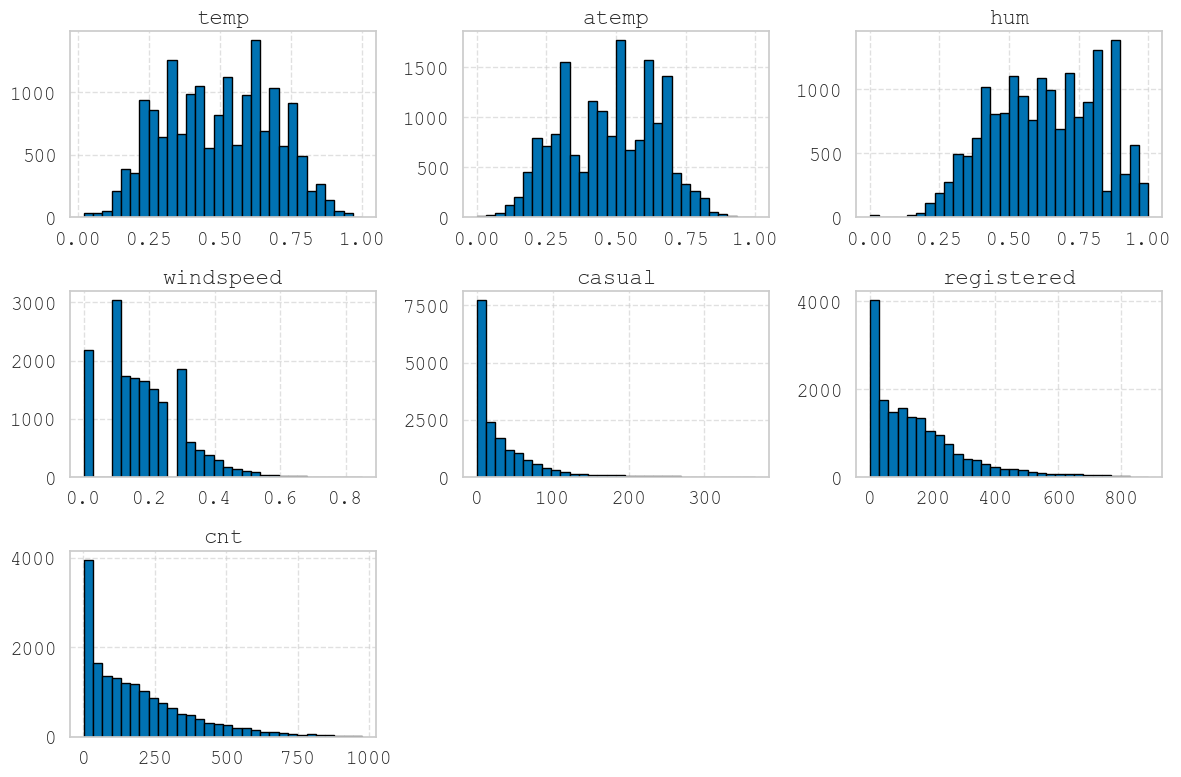

In [118]:
# Histograms for true numeric columns

import matplotlib.pyplot as plt

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot histograms
df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor='black') # Adjust the number of bins as needed
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()





/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


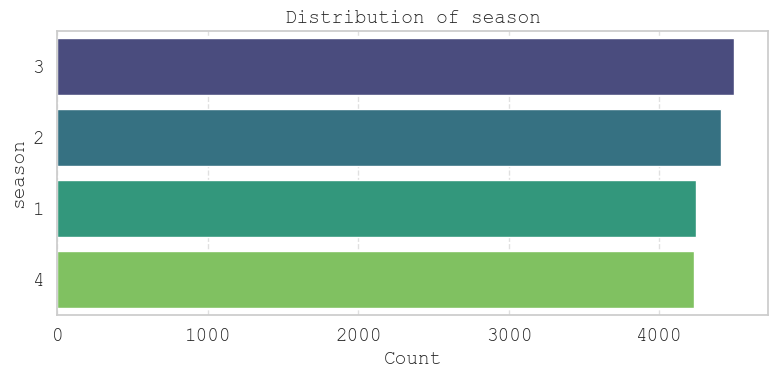

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


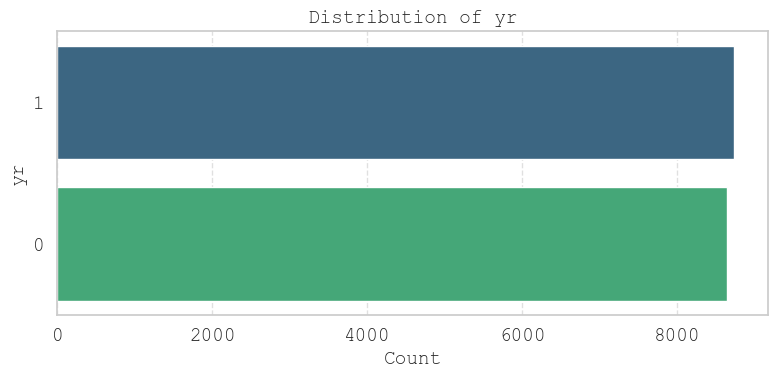

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


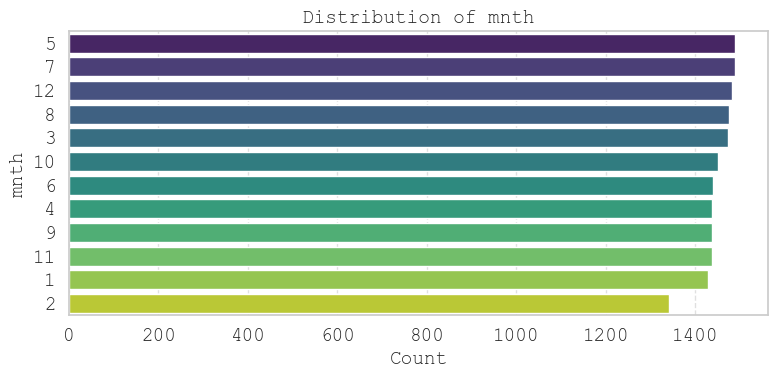

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


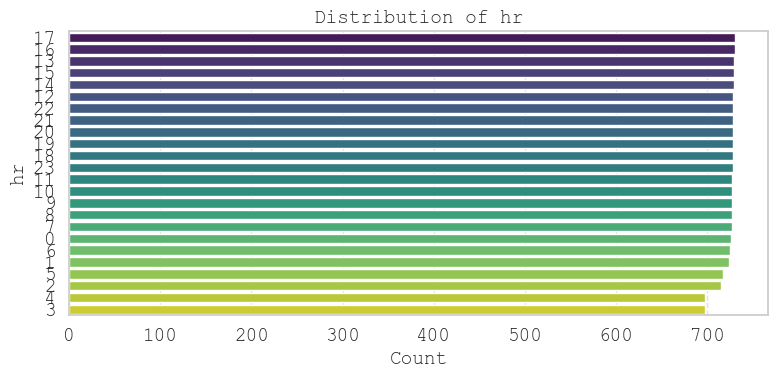

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


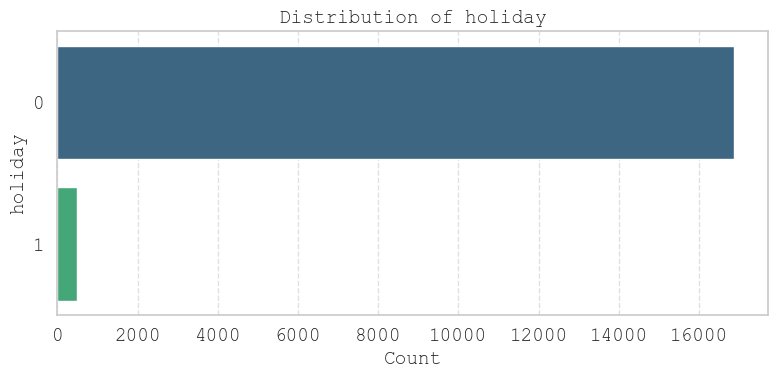

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


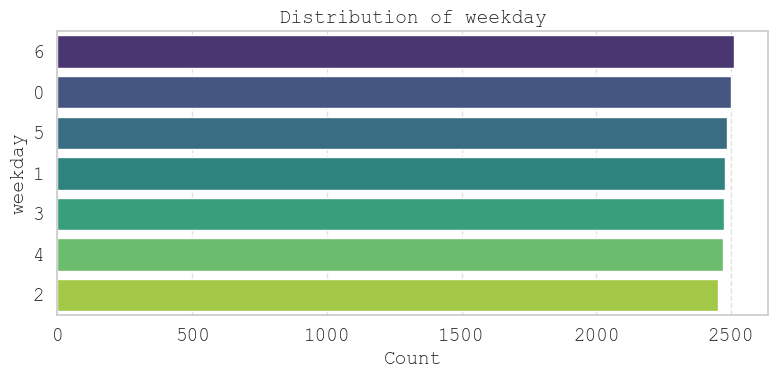

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


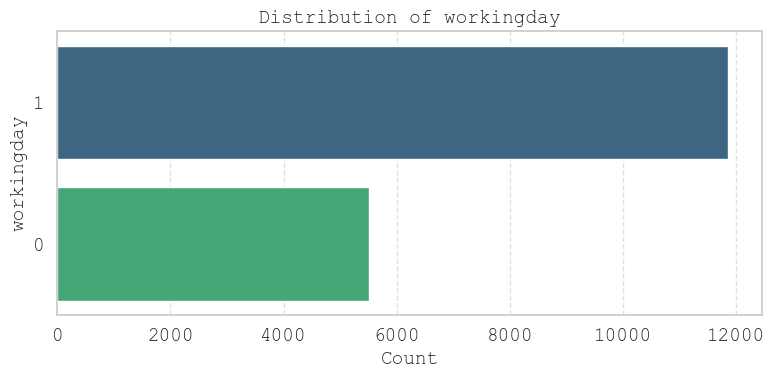

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/3443104258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


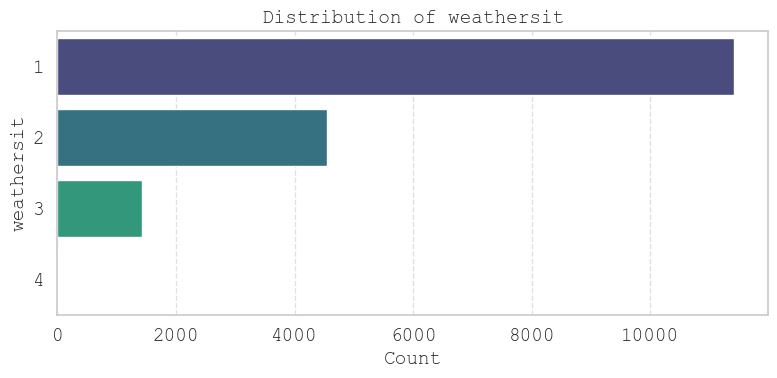

In [119]:
# Count plots for categorical columns

# Define our categorical columns (either object or numeric-as-category)
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Loop through each and plot
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# We might want to keep only the most relevant plots of categorical columns for further analysis. 
# Some of the plots seem unbalanced, this might be related to the fact that the data is already clean, so some unpopular hours, for example,  that produced no rentals, are not represented in the dataset.

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


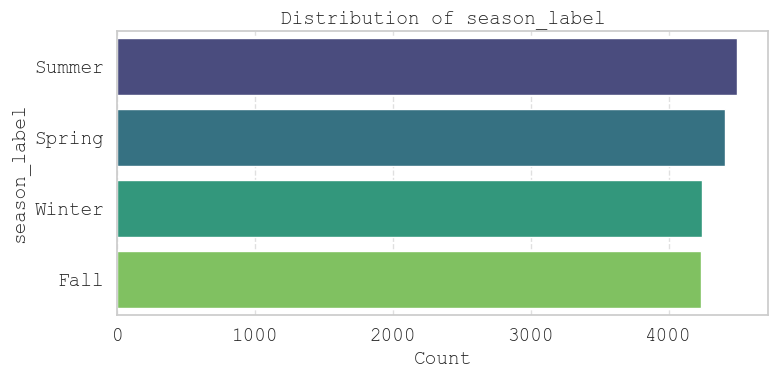

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


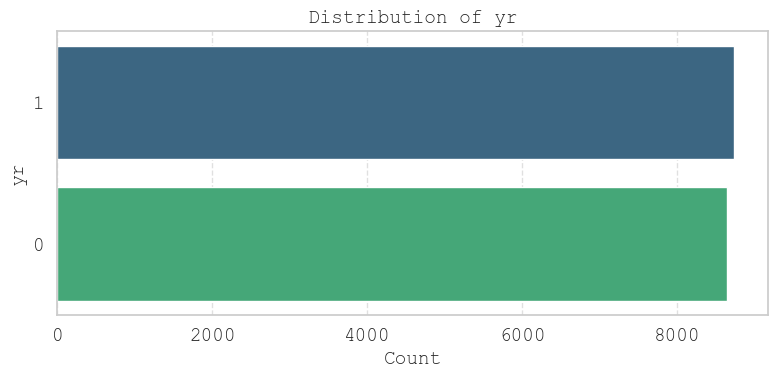

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


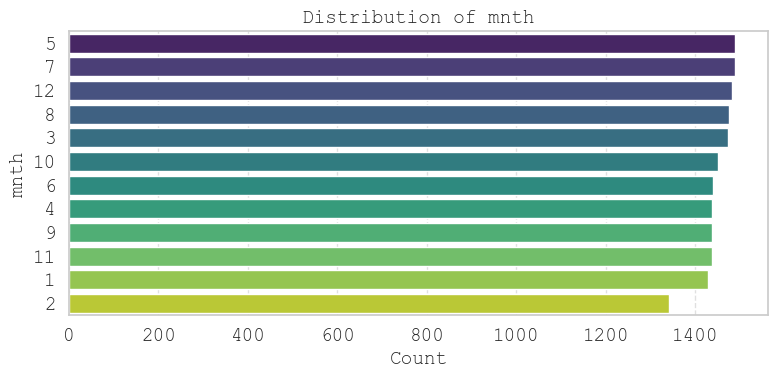

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


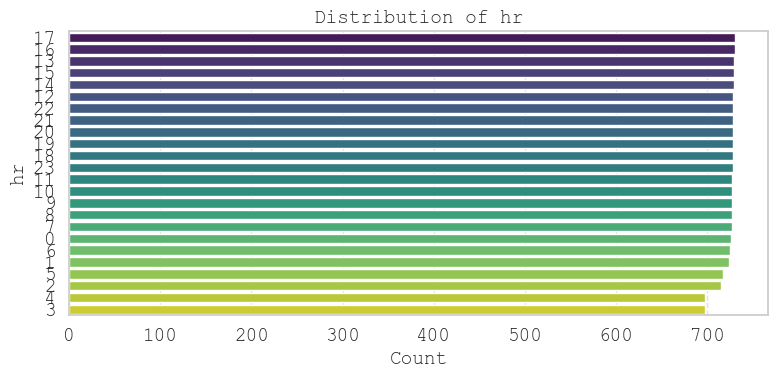

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


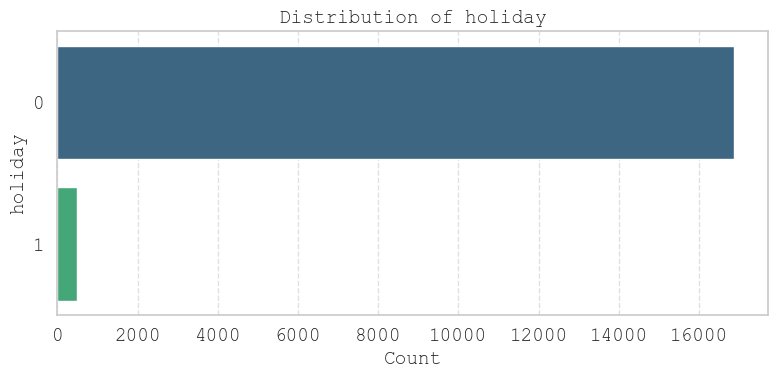

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


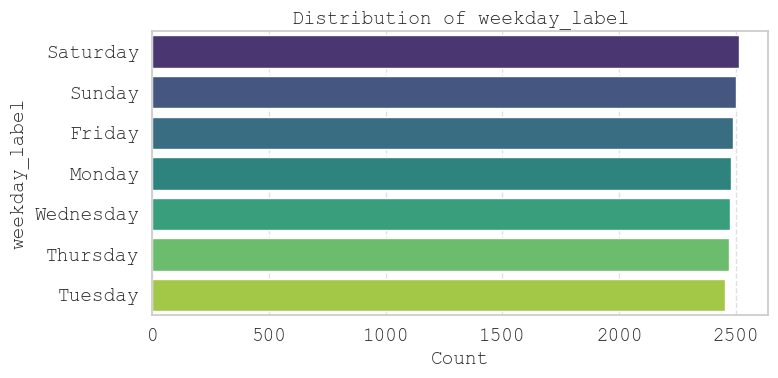

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


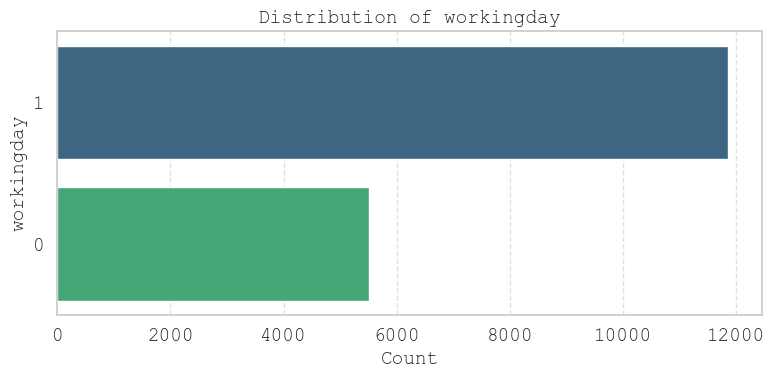

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/1150098743.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


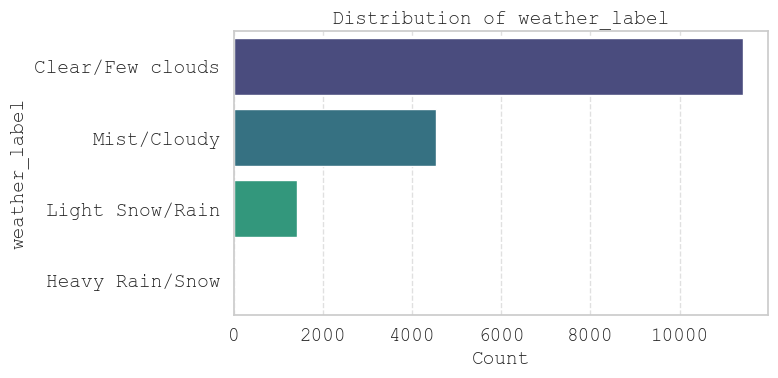

In [120]:
# Count plots for categorical columns
# Replace numeric values with readable labels for better visualization

# Mapping dictionaries
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Add mapped columns
df['season_label'] = df['season'].map(season_map)
df['weather_label'] = df['weathersit'].map(weather_map)
df['weekday_label'] = df['weekday'].map(weekday_map)

cat_cols = ['season_label', 'yr', 'mnth', 'hr','holiday', 'weekday_label', 'workingday', 'weather_label']

# Plot with labels instead of numbers
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



# We might want to keep only the most relevant plots of categorical columns for further analysis. 
# Some of the plots seem unbalanced, this might be related to the fact that the data is already clean, so some unpopular hours, for example,  that produced no rentals, are not represented in the dataset.

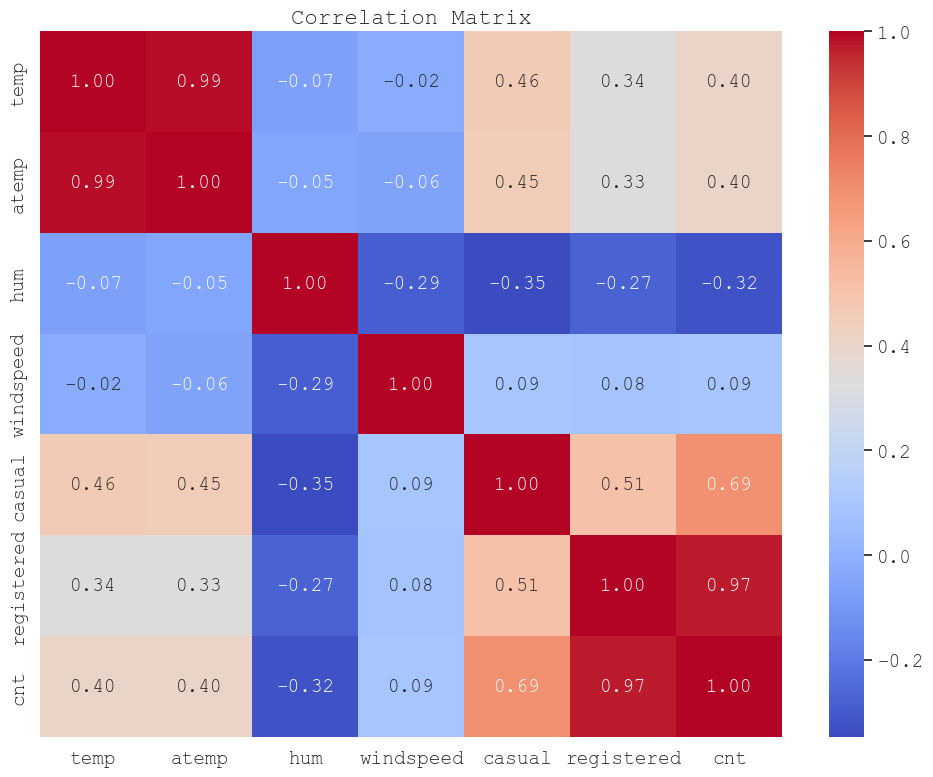

In [121]:
# Correlation heatmap for true numeric features

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(10,8)) # Create a figure with a specified size
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# df.[numeric_cols].corr() Computes the correlation matrix of all true numeric columns in the DataFrame
# annot=True: shows the correlation coefficients inside each square.
# cmap='coolwarm': uses the coolwarm color palette, where:
# Blue = negative correlation
# Red = positive correlation
# fmt=".2f": formats the annotations with 2 decimal places

plt.title("Correlation Matrix")
plt.show()



It is important to remember:

Correlation ≠ Causation: A strong correlation doesn't mean one variable causes the other.

Outliers and non-linear relationships might distort correlation values.

Multicollinearity: If two variables are too highly correlated (like temp and atemp), we may want to drop one in modeling.

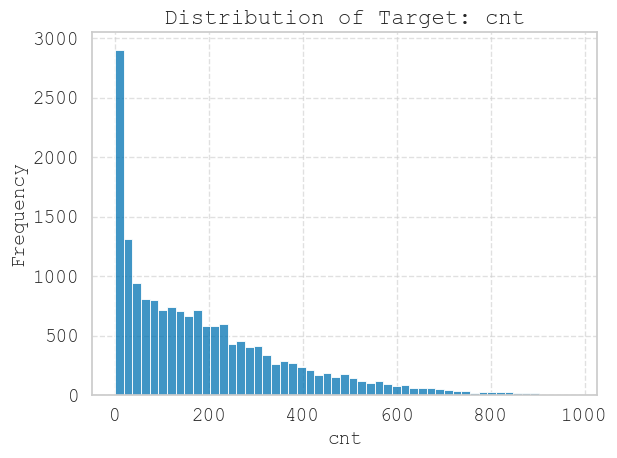

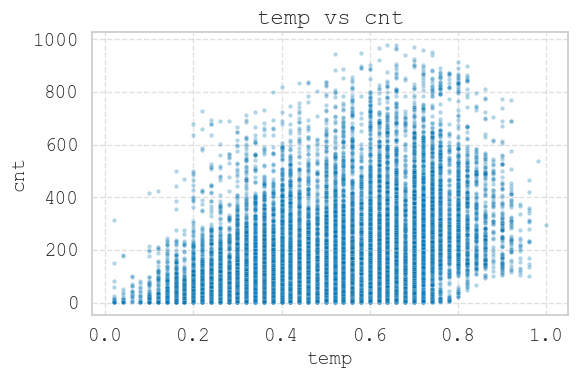

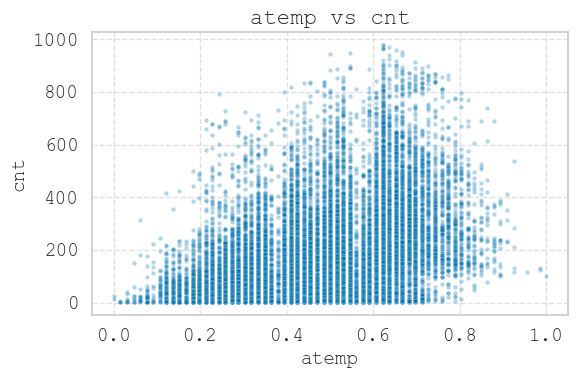

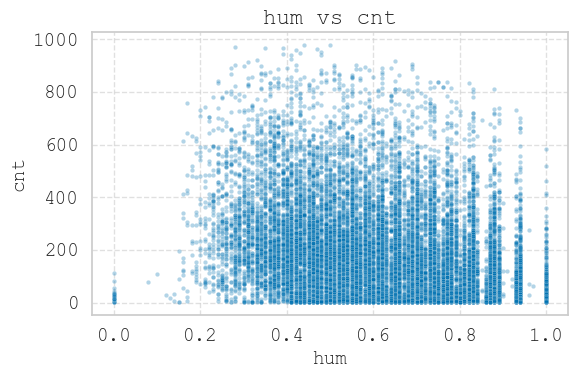

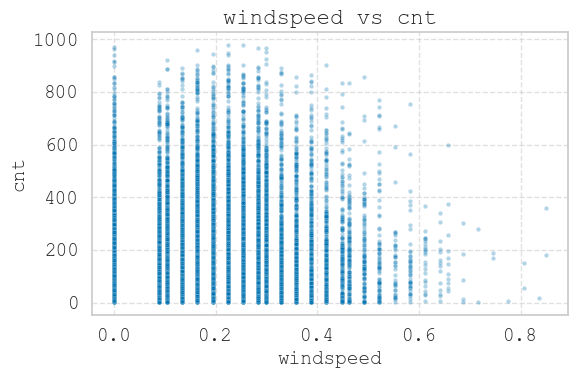

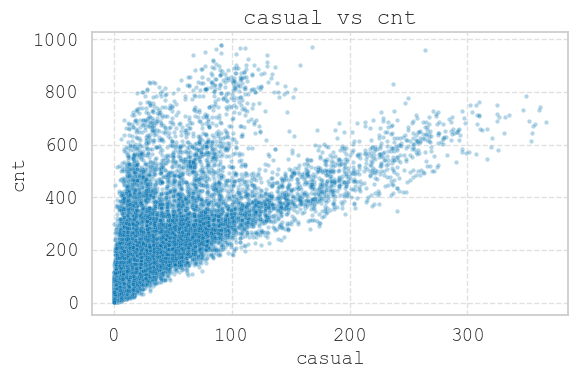

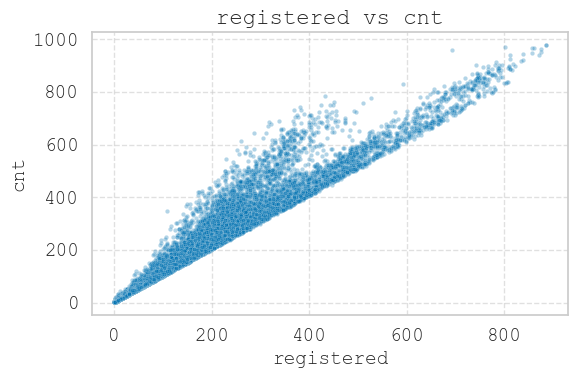

In [122]:
# Distribution of the target variable and its relationship with other numeric features

# Selected numeric columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
target = 'cnt' # The target variable we want to analyze

# Distribution of the target variable
sns.histplot(df[target]) 
# Draw a histogram of the data in df[target] (a bar chart of frequency counts)

plt.title(f'Distribution of Target: {target}')
plt.xlabel(target)
plt.ylabel("Frequency")
plt.show()

# Relationship with other numeric features
num_features = [col for col in numeric_cols if col != target]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y=target, data=df, alpha=0.3, s=10)  # alpha=0.3 makes points more transparent, s=10 sets the size of the points
    plt.title(f'{col} vs {target}')
    plt.show()



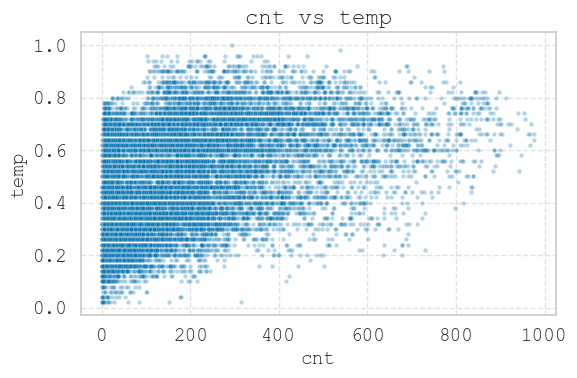

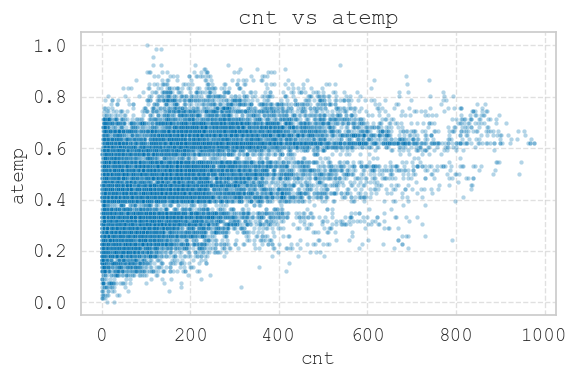

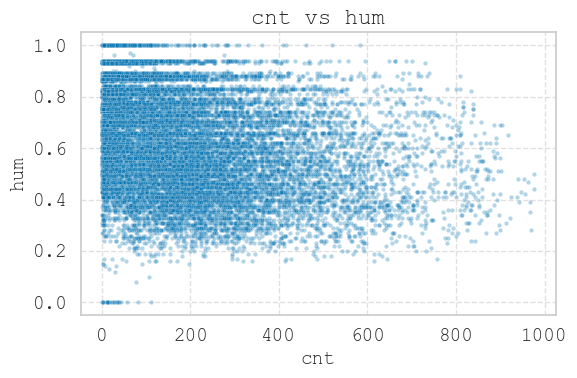

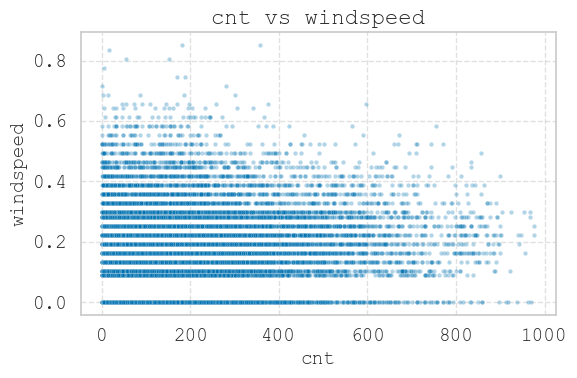

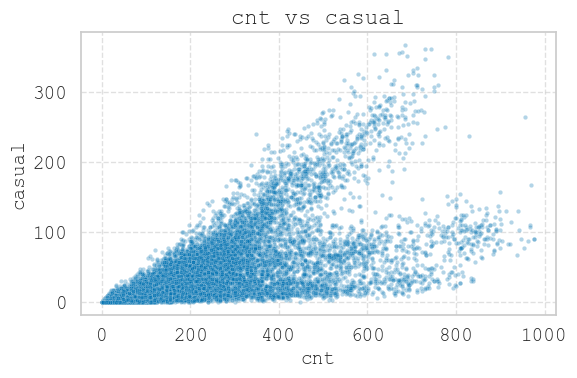

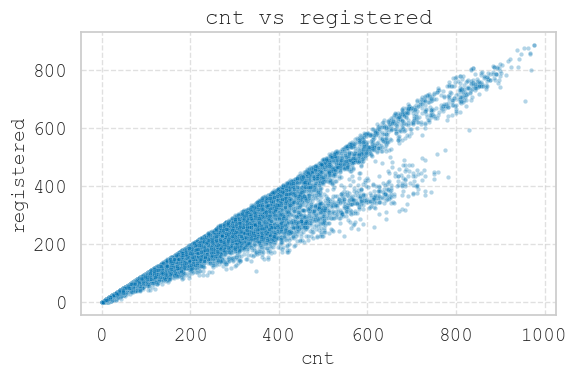

In [123]:
# Relationship with other numeric features (target on x-axis)
num_features = [col for col in numeric_cols if col != target]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=target, y=col, data=df, alpha=0.3, s=10)  # Now target is on x-axis
    plt.title(f'{target} vs {col}')
    plt.xlabel(target)
    plt.ylabel(col)
    plt.show()


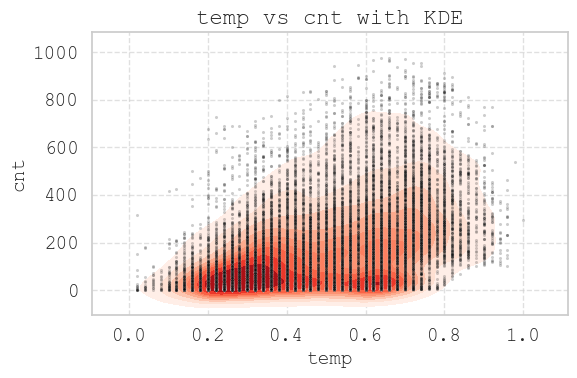

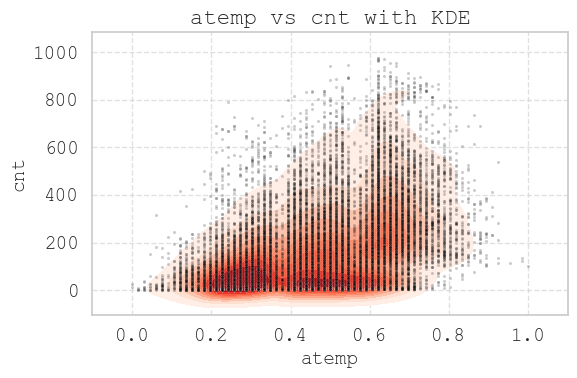

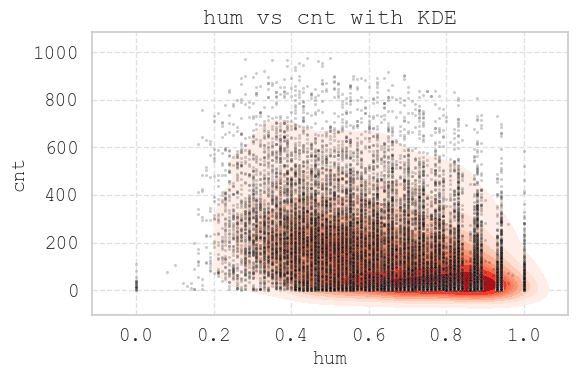

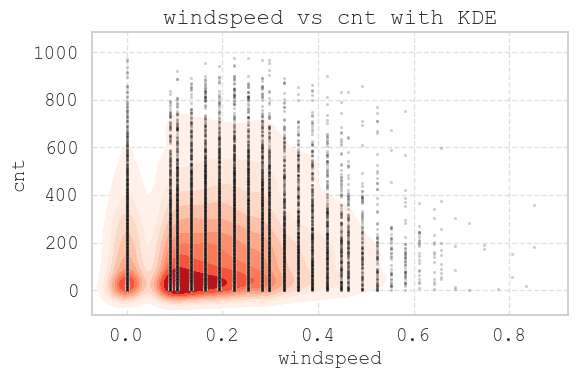

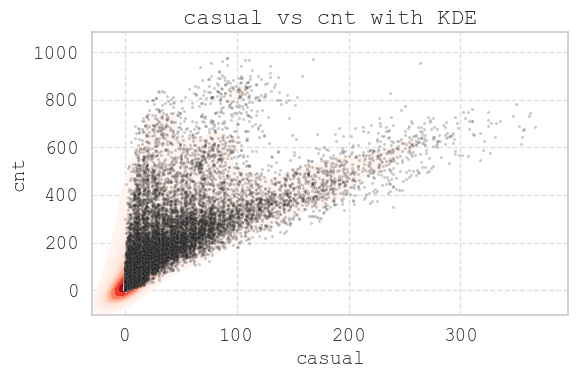

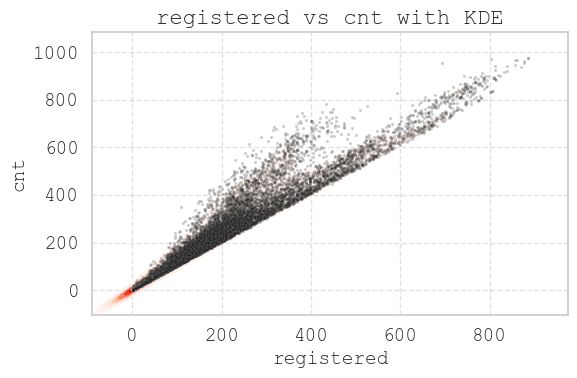

In [143]:
# KDE plots for numeric features against the target variable
# KDE (Kernel Density Estimate) plots are useful for visualizing the distribution of a variable and its relationship with another variable.
# They provide a smoothed estimate of the probability density function of the variable.

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=df[col], y=df[target], cmap="Reds", fill=True, thresh=0.05)
    sns.scatterplot(x=col, y=target, data=df, alpha=0.2, s=5, color='black')
    plt.title(f'{col} vs {target} with KDE')
    plt.tight_layout()
    plt.show()

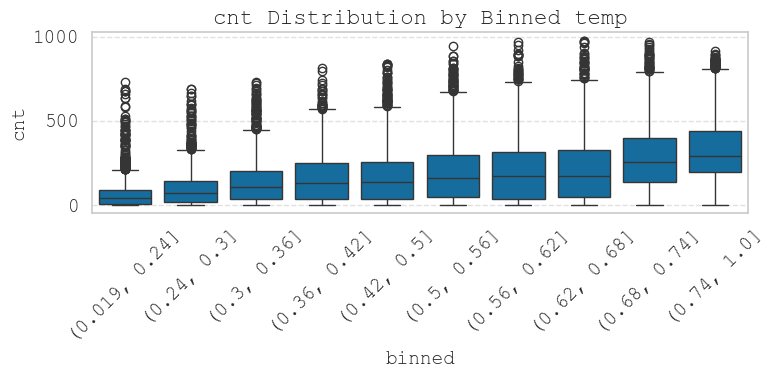

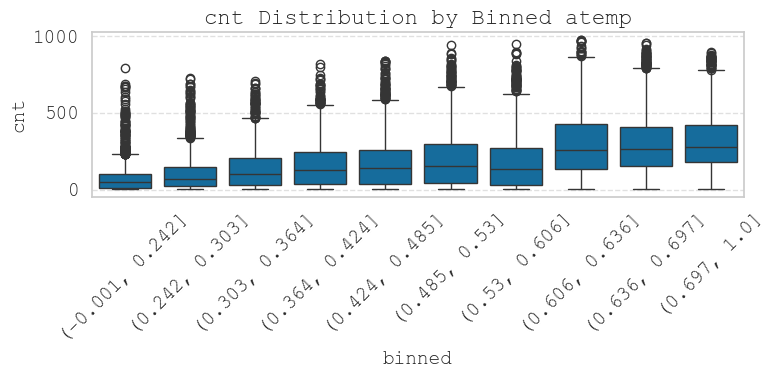

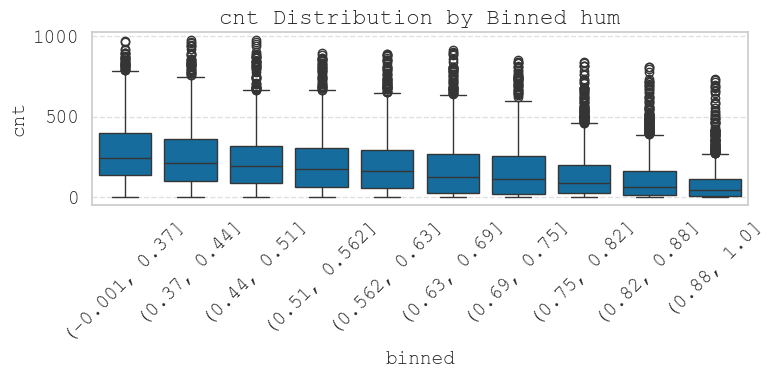

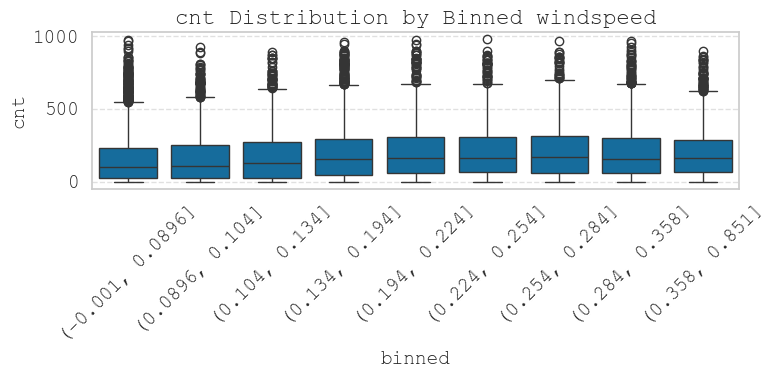

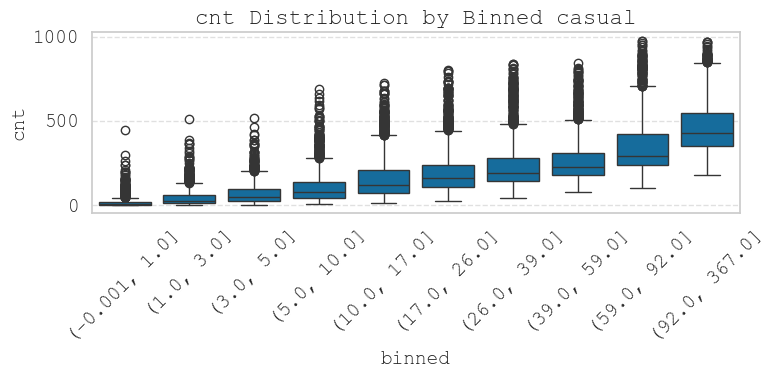

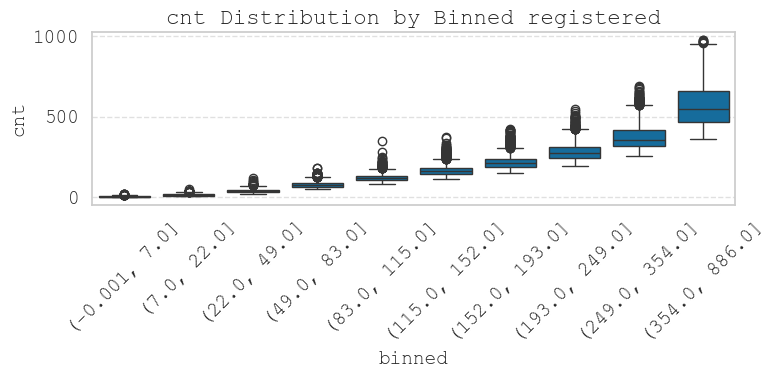

In [144]:
# Box plots for binned numeric features against the target variable

for col in num_features:
    df['binned'] = pd.qcut(df[col], q=10, duplicates='drop')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='binned', y=target, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{target} Distribution by Binned {col}')
    plt.tight_layout()
    plt.show()
# Pros:
# - Effectively visualizes the distribution of the target variable across different bins of the feature.
# - Highlights potential non-linear relationships between the feature and the target.
# - Makes it easier to identify outliers and the overall spread of the target variable.
# Cons:
# - Binning can lead to loss of information, especially if the bins are too coarse.
# - The choice of binning strategy can significantly affect the results.

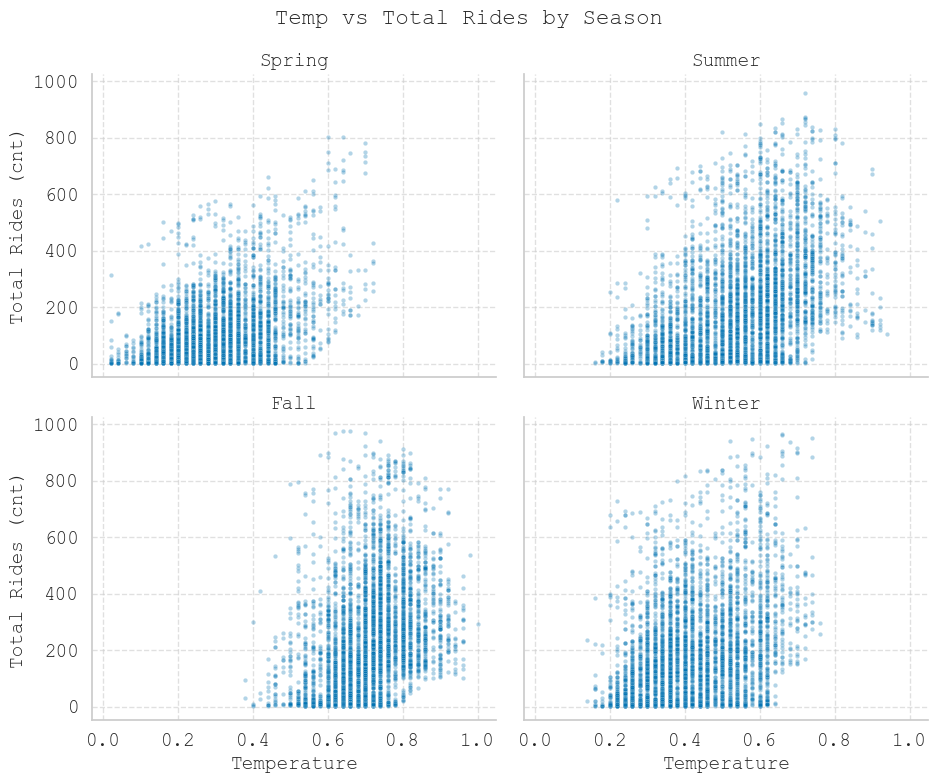

In [146]:
# Create the FacetGrid 
# FacetGrid is a way to visualize data across multiple subplots, allowing us to see how a variable changes across different categories.

g = sns.FacetGrid(df, col='season_label', col_wrap=2, height=4, aspect=1.2)
g.map(sns.scatterplot, 'temp', 'cnt', alpha=0.3, s=10)
g.set_titles('{col_name}')
g.set_axis_labels('Temperature', 'Total Rides (cnt)')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs Total Rides by Season', fontsize=16)
plt.show()

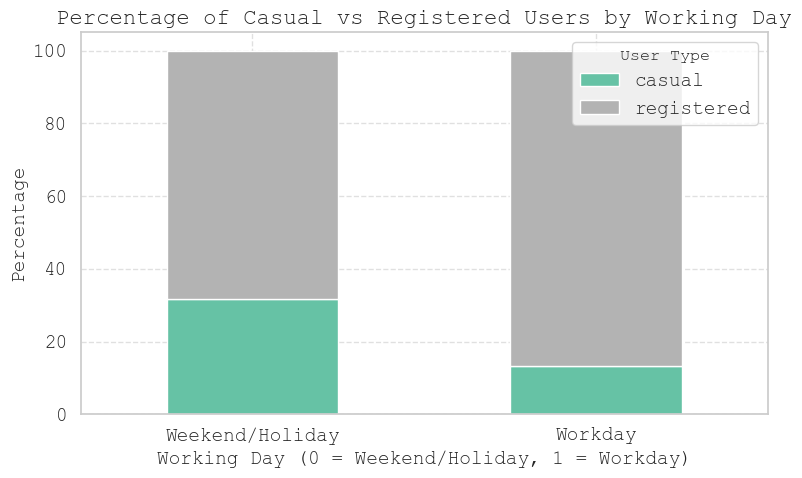

In [124]:
# Percentage of casual vs registered users by working day

# Group by workingday and sum user counts
grouped = df.groupby('workingday')[['casual', 'registered']].sum()

# Calculate percentages
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100
# grouped.sum(axis=1) calculates the row-wise totals (casual + registered for each group)
# grouped.sum(axis=1) calculates the row-wise totals (casual + registered for each group)
# .div(..., axis=0) divides each row's values by its row total — this gives proportions

# Plot stacked bar chart
grouped_percent.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2') # Create a stacked bar chart

# Customize plot
plt.title('Percentage of Casual vs Registered Users by Working Day')
plt.xlabel('Working Day (0 = Weekend/Holiday, 1 = Workday)')
plt.ylabel('Percentage')
plt.legend(title='User Type')
plt.xticks(ticks=[0, 1], labels=['Weekend/Holiday', 'Workday'], rotation=0)
plt.tight_layout()
plt.show()


/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/649538029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_casual_holiday, x='holiday', y='casual',


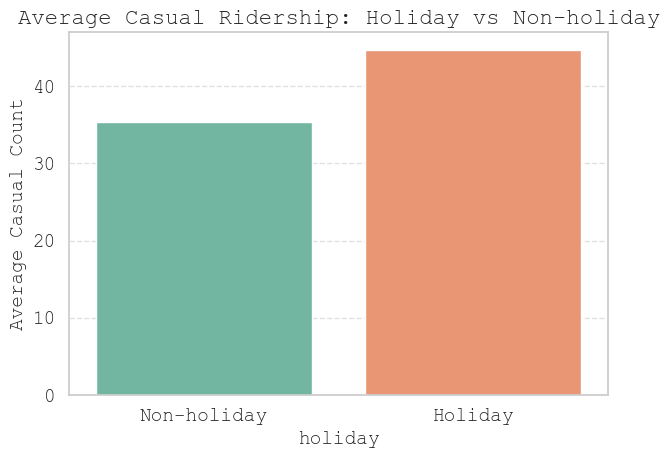

In [125]:

# Compute average casual count by holiday vs non-holiday
avg_casual_holiday = df.groupby('holiday')['casual'].mean().reset_index()

sns.barplot(data=avg_casual_holiday, x='holiday', y='casual',
            palette='Set2')
plt.xticks([0, 1], ['Non-holiday', 'Holiday'])
plt.ylabel('Average Casual Count')
plt.title('Average Casual Ridership: Holiday vs Non-holiday')
plt.show()


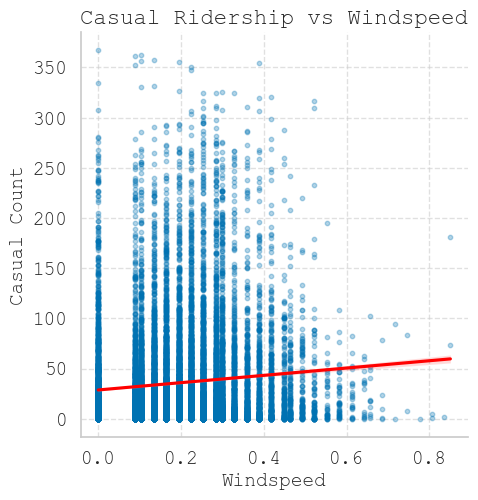

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/2906371233.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_wind = df.groupby('wind_bin')['casual'].mean().reset_index() # mean casual counts for each windspeed bin
/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/2906371233.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_wind, x='wind_bin', y='casual', palette='Blues_d')


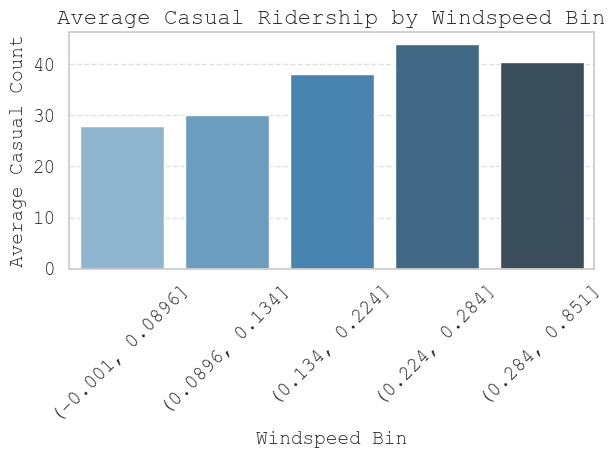

In [126]:
# SOMETHING a little weird came out here, have to look into it
# I would have expected:
# Negative slopped trend line in scatter plot suggesting that higher windspeed correlates with fewer casual rides.
# In bar plot, decreasing trend in average casual counts from low to high wind bins.

# Scatter plot with trend line
sns.lmplot(data=df, x='windspeed', y='casual', scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
# scatter_kws sets the transparency and size of the scatter points
plt.title('Casual Ridership vs Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Casual Count')
plt.show()

# Binned analysis (e.g., 5 groups)
df['wind_bin'] = pd.qcut(df['windspeed'], q=5) # Create bins for windspeed using quantiles
avg_by_wind = df.groupby('wind_bin')['casual'].mean().reset_index() # mean casual counts for each windspeed bin

sns.barplot(data=avg_by_wind, x='wind_bin', y='casual', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Average Casual Ridership by Windspeed Bin')
plt.xlabel('Windspeed Bin')
plt.ylabel('Average Casual Count')
plt.show()


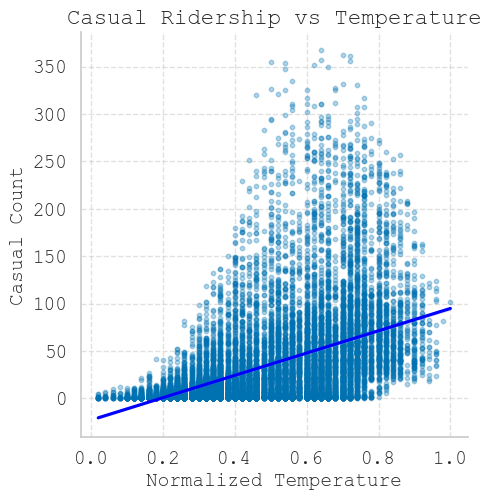

/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/4043909522.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_temp = df.groupby('temp_bin')['casual'].mean().reset_index().sort_values('temp_bin')
/var/folders/2t/_qccqblj6sbg3zx9bhx_g6tm0000gn/T/ipykernel_15677/4043909522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_temp, x='temp_bin', y='casual', palette='Oranges')


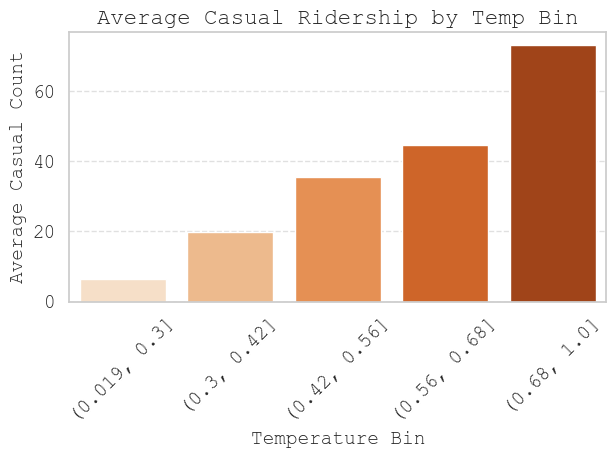

In [127]:
# Scatter plot with trend line
sns.lmplot(data=df, x='temp', y='casual', scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'blue'})
plt.title('Casual Ridership vs Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Casual Count')
plt.show()

# Binned temperature analysis
df['temp_bin'] = pd.qcut(df['temp'], q=5)
avg_by_temp = df.groupby('temp_bin')['casual'].mean().reset_index().sort_values('temp_bin')

sns.barplot(data=avg_by_temp, x='temp_bin', y='casual', palette='Oranges')
plt.xticks(rotation=45)
plt.title('Average Casual Ridership by Temp Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Casual Count')
plt.show()


In [128]:
from scipy.stats import ttest_ind

# p-value < 0.05 in ttest_ind: significant difference.

# Correlation close to +1 or –1 indicates a strong linear relationship.

# Test holiday vs non-holiday difference
holiday_casual = df[df['holiday'] == 1]['casual']
nonholiday_casual = df[df['holiday'] == 0]['casual']
print("Holiday vs Non-holiday:", ttest_ind(holiday_casual, nonholiday_casual, equal_var=False))

# Correlation values
print("r(temp, casual) =", df['temp'].corr(df['casual']))
print("r(windspeed, casual) =", df['windspeed'].corr(df['casual']))


Holiday vs Non-holiday: Ttest_indResult(statistic=3.49044822485621, pvalue=0.0005232268100178366)
r(temp, casual) = 0.45961564554484624
r(windspeed, casual) = 0.09028677509691817


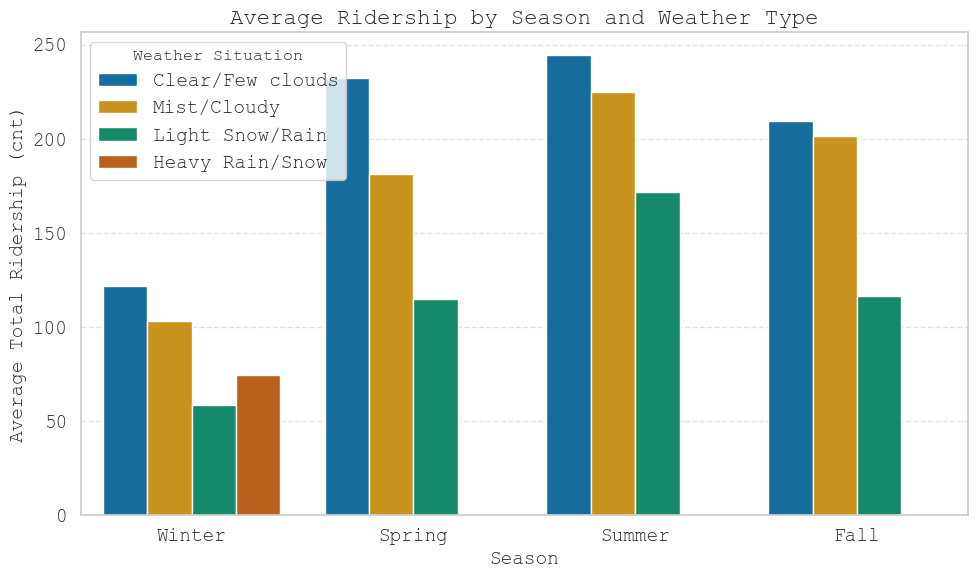

In [129]:
# Given a certain type of weather, how does time of the year or season affect ridership levels?

# Group by weather and season
grouped = df.groupby(['weathersit', 'season'])['cnt'].mean().reset_index() # Calculate average total ridership (cnt) for each combination of weather situation and season
# reset_index() converts the result back to a DataFrame, with 'weathersit' and 'season' as columns instead of indices.

# Map numbers to season and weather labels for readability
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

grouped['season'] = grouped['season'].map(season_map)
grouped['weathersit'] = grouped['weathersit'].map(weather_map)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='season', y='cnt', hue='weathersit')
plt.title('Average Ridership by Season and Weather Type')
plt.ylabel('Average Total Ridership (cnt)')
plt.xlabel('Season')
plt.legend(title='Weather Situation')
plt.show()


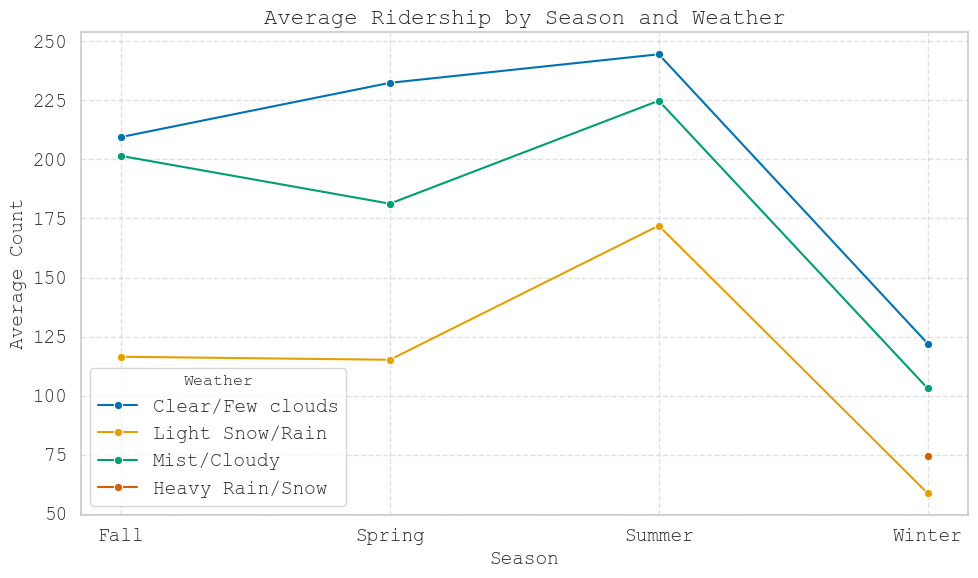

In [130]:


# Map numeric values to readable labels
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

# Add mapped columns for clarity
df['season_label'] = df['season'].map(season_map) # Map season numbers to labels
df['weather_label'] = df['weathersit'].map(weather_map)

# Group by season and weather to compute mean ridership
grouped = df.groupby(['season_label', 'weather_label'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='season_label', y='cnt', hue='weather_label', marker='o')

plt.title('Average Ridership by Season and Weather')
plt.ylabel('Average Count')
plt.xlabel('Season')
plt.legend(title='Weather')
plt.tight_layout()
plt.show()




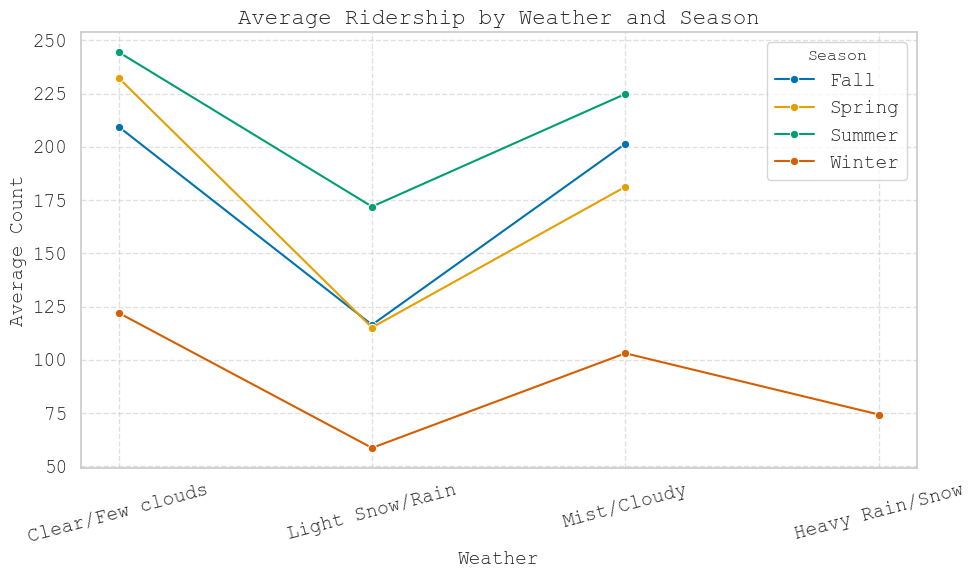

In [131]:
# Group by season and weather to compute mean ridership
grouped = df.groupby(['season_label', 'weather_label'])['cnt'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='weather_label', y='cnt', hue='season_label', marker='o')

plt.title('Average Ridership by Weather and Season')
plt.ylabel('Average Count')
plt.xlabel('Weather')
plt.legend(title='Season')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


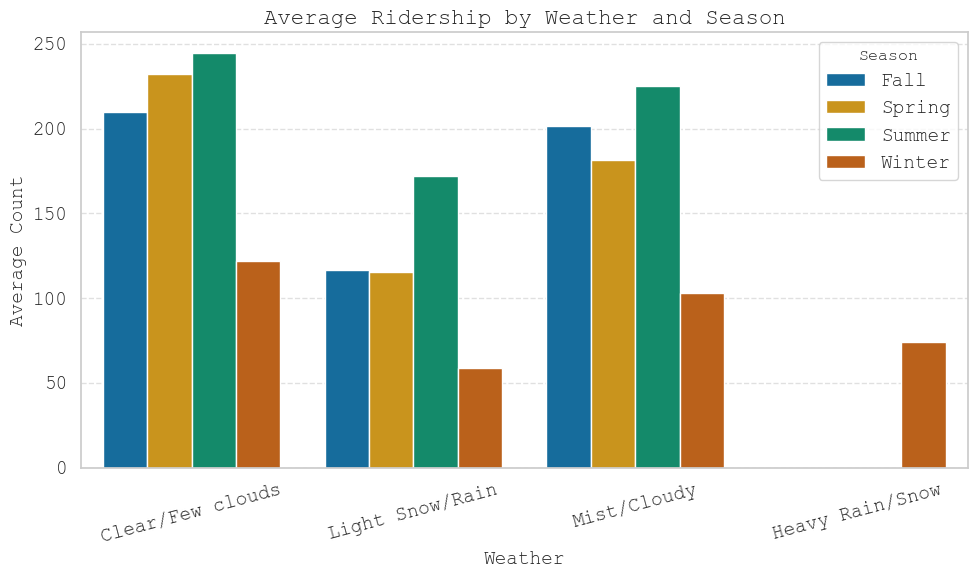

In [132]:


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='weather_label', y='cnt', hue='season_label')

plt.title('Average Ridership by Weather and Season')
plt.ylabel('Average Count')
plt.xlabel('Weather')
plt.legend(title='Season')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



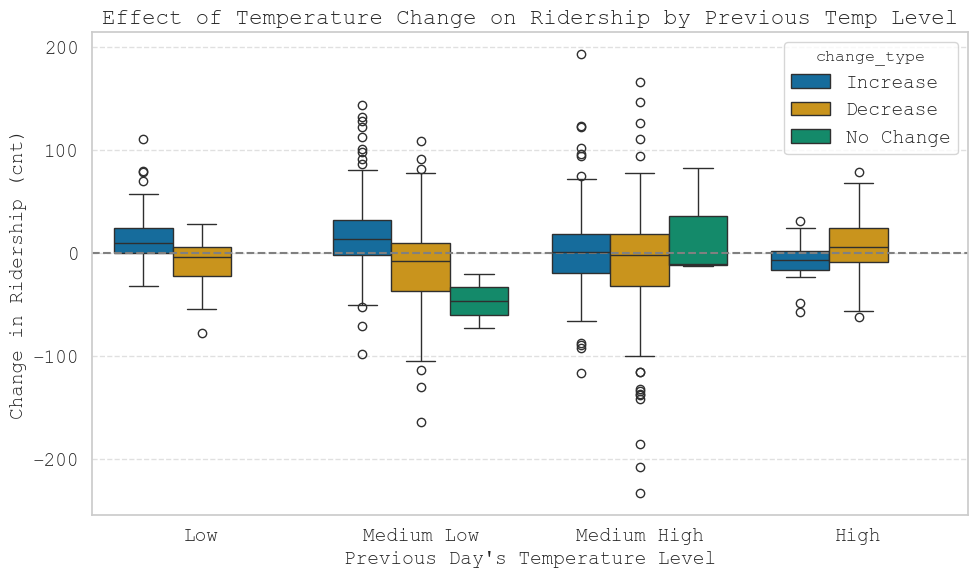

In [133]:

# Ensure date column is datetime and sorted
df['dteday'] = pd.to_datetime(df['dteday'])
daily = df.groupby('dteday')[['temp', 'cnt']].mean().sort_index()

# Calculate day-to-day temperature and ridership change
daily['temp_diff'] = daily['temp'].diff()
daily['cnt_diff'] = daily['cnt'].diff()
daily['prev_temp'] = daily['temp'].shift(1)  # Temperature of previous day

# Label change direction
daily['change_type'] = daily['temp_diff'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change')) 

# Create temperature level bins
daily['prev_temp_level'] = pd.cut(daily['prev_temp'], bins=[0, 0.25, 0.5, 0.75,1.0], labels=['Low', 'Medium Low', 'Medium High', 'High']) 

plt.figure(figsize=(10, 6))
sns.boxplot(data=daily.dropna(), x='prev_temp_level', y='cnt_diff', hue='change_type') 
plt.title("Effect of Temperature Change on Ridership by Previous Temp Level")
plt.xlabel("Previous Day's Temperature Level")
plt.ylabel("Change in Ridership (cnt)")
plt.axhline(0, color='gray', linestyle='--') 
plt.tight_layout() 
plt.show() 



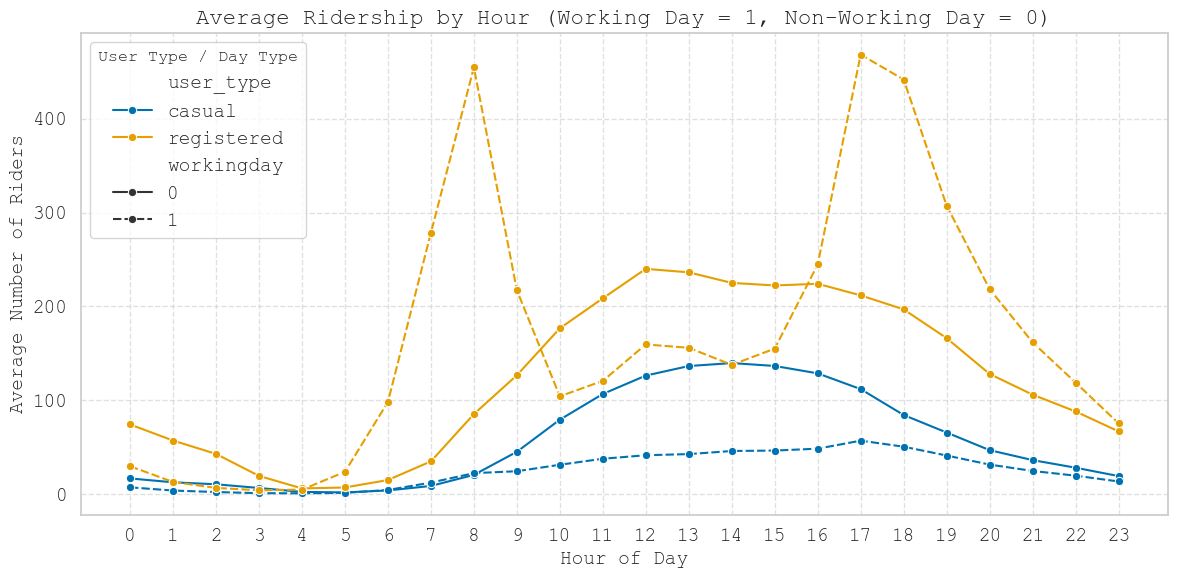

In [134]:
# What time of the day on working days vs non working days, do we see the greatest increase in casual vs. registered ridership?

# Group and compute mean ridership
grouped = df.groupby(['hr', 'workingday'])[['casual', 'registered']].mean().reset_index()
# Reset index to flatten the DataFrame for easier plotting

# Melt for easier plotting
melted = pd.melt(grouped,
                 id_vars=['hr', 'workingday'],
                 value_vars=['casual', 'registered'],
                 var_name='user_type',
                 value_name='avg_rides')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted,
             x='hr',
             y='avg_rides',
             hue='user_type',
             style='workingday',  # Will show 0 vs 1 as line styles
             marker='o')
plt.title('Average Ridership by Hour (Working Day = 1, Non-Working Day = 0)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Riders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='User Type / Day Type')
plt.tight_layout()
plt.show()


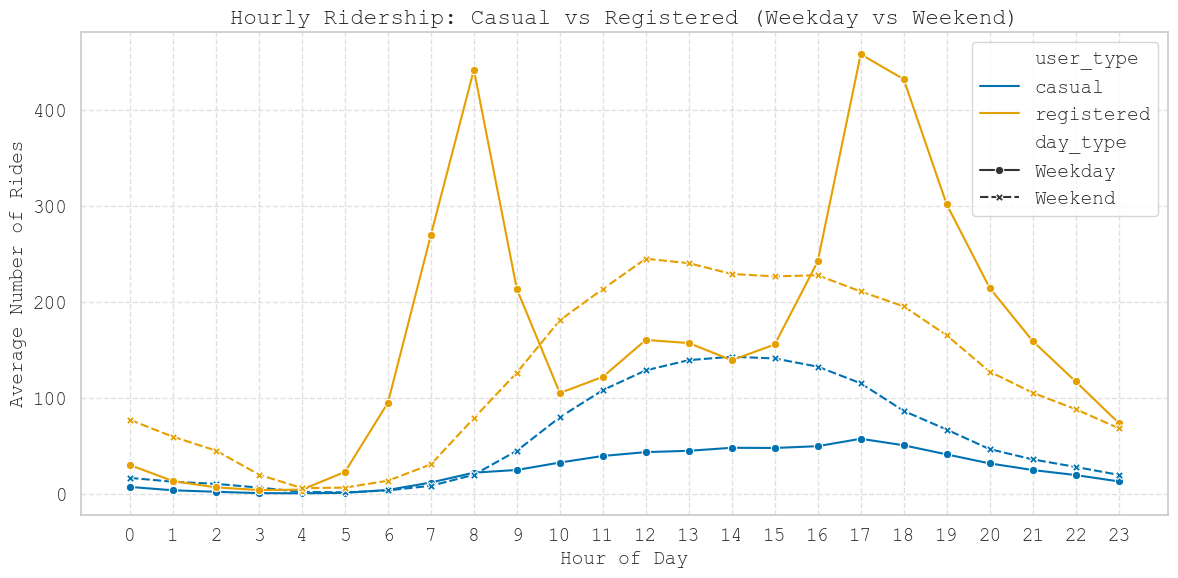

In [135]:
# What time of the day on weekends vs weekdays, do we see the greatest increase in casual vs. registered ridership?

# Map to 'Weekday' vs 'Weekend'
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Group by hour and day type, then calculate the mean
grouped = df.groupby(['hr', 'day_type'])[['casual', 'registered']].mean().reset_index()

# Melt the data for easier plotting
melted = pd.melt(
    grouped,
    id_vars=['hr', 'day_type'],
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='avg_rides'
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted, x='hr', y='avg_rides', hue='user_type', style='day_type', markers=True)
plt.title('Hourly Ridership: Casual vs Registered (Weekday vs Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

